# Python and Quantopian Tools

## Reasons to use Python

- Speed
    - Python is much faster
- Big Data
    - Python tools for blocked/parallel computing is more well regarded, and older than R alternatives
        - Blaze/Dask
        - pyspark
        - sklearn (partial fit)

## Reasons to use Python

- Packages
    - NLTK
    - Web Scraping
        - beautifulsoup, Scrapy, Selenium
    - Deep Learning
    - Quantopian (other backtesting frameworks)    
- Implement into production (app/software)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import timeit

In [2]:
songs = pd.read_csv("YearPredictionMSD.txt", header = None)

In [3]:
songs["id"] = np.repeat(range(0, songs.shape[0] // 6 + 1), 6)[range(0, songs.shape[0])]

## Speed

- Python's data science tools are better optimized for speed.
- Numpy arrays are the building blocks for most of python's data science tools, and numpy arrays are optimized for speed.
- Pandas provides high-level, easy-to-use, data manipulation tools built off of numpy. 


## Speed Testing

- Comparing Python and R using the "Million Songs" dataset
    - Tidyverse vs Pandas/Numpy Aggregate
    - Random Forest in R vs sklearn

### Data

- 438 MB
- Response is the year of the song release
- 90 features taken from the audio
- Added an id column for the purpose of comparing pandas and dplyr performance

In [4]:
songs.shape

(515345, 92)

In [5]:
songs.head(10)

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,id
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,0
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,0
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,0
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,0
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903,0
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263,0
6,2001,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192,1
7,2001,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556,1
8,2001,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680,1
9,2007,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719,1


### Aggregation - Mean



``` r
songs %>%
    group_by(id) %>%
    summarise_all(funs(mean(., na.rm = TRUE))) %>%
    select(-id)
```

On my system using a single system.time call, execution time of 1.25 seconds.


In [6]:
%%timeit 

(songs
    .groupby("id")
    .mean()
    .reset_index(drop = True))

884 ms ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Aggregation - Median

``` r
songs %>%
    group_by(id) %>%
    summarise_all(funs(median(., na.rm = TRUE))) %>%
    select(-id)
```

Execution time was 497.5 seconds (8 minutes)


In [7]:
%%timeit

(songs
    .groupby("id")
    .median()
    .reset_index(drop = True))

1.2 s ± 61.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Aggregation - Custom

``` r
songs %>%
    group_by(id) %>%
    summarise_all(funs(sum(. > 0))) %>%
    select(-id)
```

Execution time was 185.8 seconds (2 minutes)

In [8]:
%%timeit -r 3

(songs
    .groupby('id')
    .apply(lambda df: (df > 0).sum())
    .reset_index(drop = True))

51 s ± 1.82 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


Additional gains can be made by converting to numpy, and letting numpy handle the calculations.

In [9]:
def number_positive(df):
    
    numpy_df = df.values
    numpy_df = numpy_df > 0
    counts = numpy_df.sum(axis = 0)
    pandas_series = pd.Series(counts)
    
    return(pandas_series)

In [10]:
%%timeit -r 3

(songs
    .groupby('id')
    .apply(number_positive)
    .reset_index(drop = True))

14.1 s ± 164 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


## Running a model

What do all good data scientists do when they first want to analyze a dataset?

Blindly run a random forest on it!

In [11]:
songs = songs.groupby("id").mean().reset_index(drop = True)

In [12]:
songs.shape

(85891, 91)

### Random Forest

``` r
fit <- randomForest(X, y, ntree=10)
```

Execution time of 525.8 seconds (9 minutes)

In [15]:
X = songs.iloc[:, range(1, 91)]
y = songs[0]

rf = RandomForestRegressor(n_estimators=10, n_jobs = 1, max_features = "sqrt", min_samples_leaf = 5)
%timeit -r 3 rf.fit(X, y)

6.31 s ± 42.4 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


## Quantopian Tools

- Alphalens
- Zipline
- Pyfolio

### Alphalens

Analyzes how predictive a single feature is at predicting stock returns.


The core functionality of alphalens is as follows.

For each day:
- Split candidate stocks into groups by the feature (quantiles)
- Calculates 1, 5, and 10 day returns for each group

Then aggregates over all days

![index.png](img/index.png)

### Zipline

- First quantopian tool
- Algorithmic trading simulator
- Used for backtesting a trading strategy/algorithm

### Zipline - Reasons to use

- Well tested and thought out platform
- Can automatically handle slippage/transaction costs
- Calculates many important metrics out of the box
    - Beta
    - Measures of variability (Sharpe/Sortino)
- Integrates with Pyfolio

### Pyfolio
Pretty tables and plots

### Simple example

In [4]:
from zipline import run_algorithm
from zipline.api import symbol, get_datetime, order_target_percent
import pyfolio
import pandas as pd

Our simple strategy is to long Apple on even days of the month, and short it on odd days.

In [2]:
def initialize(context):
    pass

def handle_data(context, data):
    day_of_month = get_datetime().day
    
    if (int(day_of_month) % 2 == 0):
        order_target_percent(symbol("AAPL"), 1)
    else:
        order_target_percent(symbol("AAPL"), -1)

In [5]:
result = run_algorithm(start = pd.Timestamp("2017-01-01", tz = "UTC"), 
                       end = pd.Timestamp("2017-06-30", tz = "UTC"), 
                       initialize = initialize, 
                       capital_base = 1000000, 
                       handle_data = handle_data,
                       data_frequency = "daily",
                       bundle = "quantopian-quandl")

In [6]:
result.positions.head()

2017-01-03 21:00:00+00:00                                                   []
2017-01-04 21:00:00+00:00    [{'cost_basis': 116.01249807190719, 'sid': Equ...
2017-01-05 21:00:00+00:00    [{'cost_basis': 116.62499919342616, 'sid': Equ...
2017-01-06 21:00:00+00:00    [{'cost_basis': 117.89491918697846, 'sid': Equ...
2017-01-09 21:00:00+00:00    [{'cost_basis': 119.00500307449789, 'sid': Equ...
Name: positions, dtype: object

In [7]:
pd.options.display.float_format = '{:20,.2f}'.format

In [8]:
result.ending_cash.head(5)

2017-01-03 21:00:00+00:00           1,000,000.00
2017-01-04 21:00:00+00:00           1,998,751.60
2017-01-05 21:00:00+00:00             -10,218.20
2017-01-06 21:00:00+00:00           2,011,573.81
2017-01-09 21:00:00+00:00             -18,523.59
Name: ending_cash, dtype: float64

Entire data start date: 2017-01-03
Entire data end date: 2017-06-30
Backtest months: 5


,Backtest
Annual return,18.0%
Cumulative returns,8.5%
Annual volatility,17.2%
Sharpe ratio,1.04
Calmar ratio,1.79
Stability,0.64
Max drawdown,-10.0%
Omega ratio,1.23
Sortino ratio,1.89
Skew,1.70


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,10.04,2017-06-09,2017-06-26,NaT,NaN
1,5.55,2017-02-06,2017-03-15,2017-03-28,37
2,4.59,2017-04-24,2017-05-05,2017-05-17,18
3,2.68,2017-05-23,2017-06-02,2017-06-09,14
4,2.56,2017-01-06,2017-01-30,2017-02-01,19


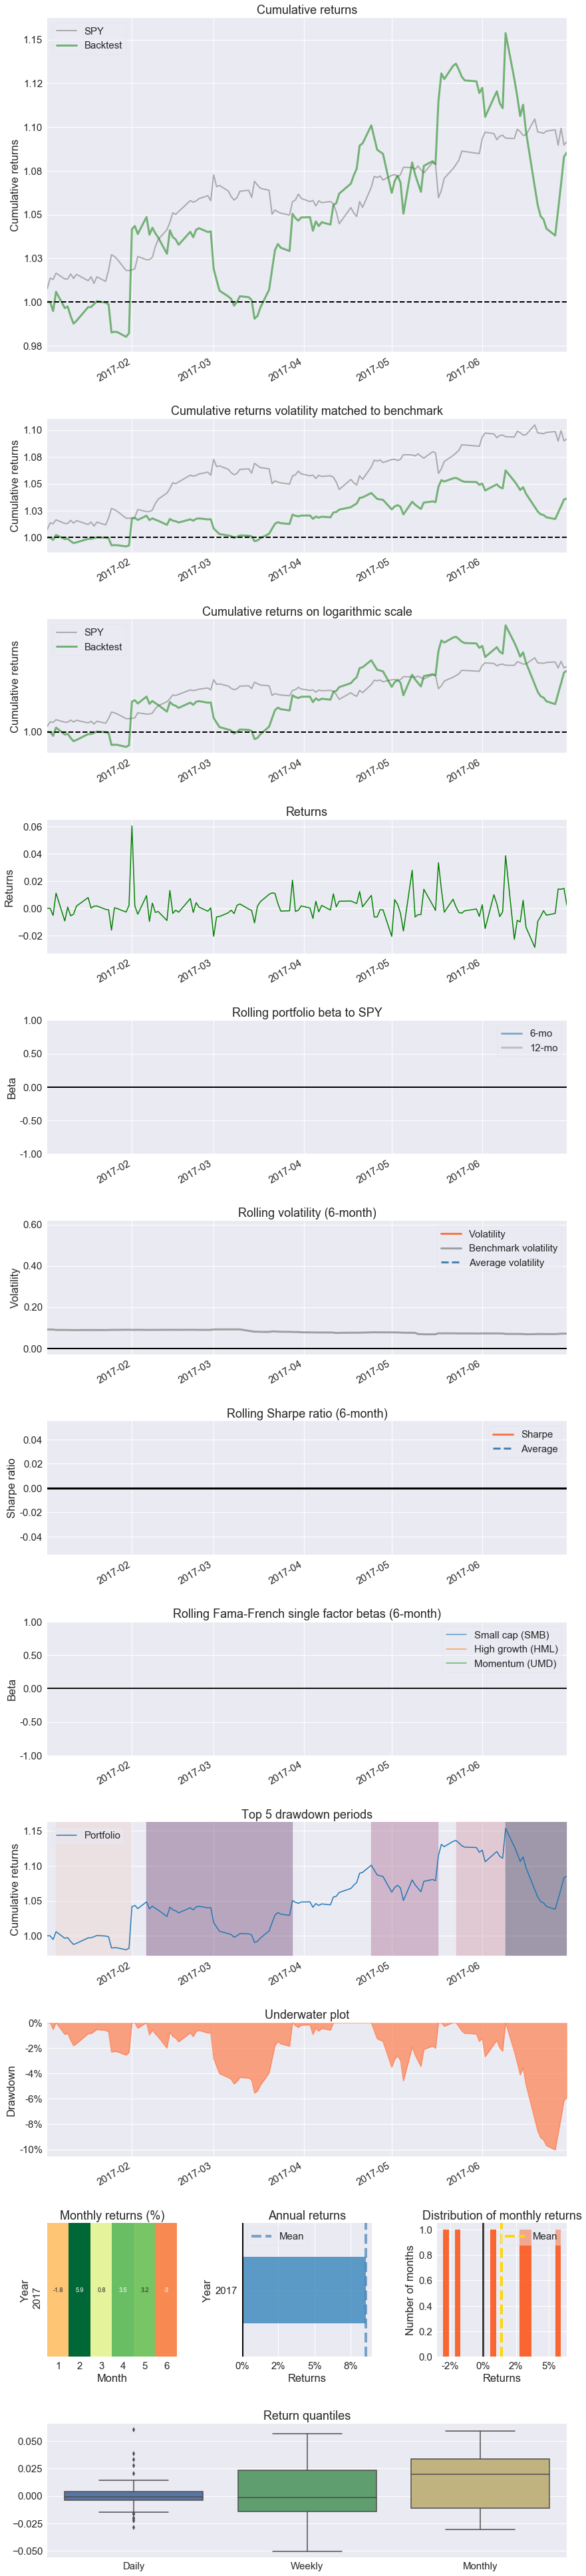

Stress Events,mean,min,max
New Normal,0.07%,-2.87%,6.06%


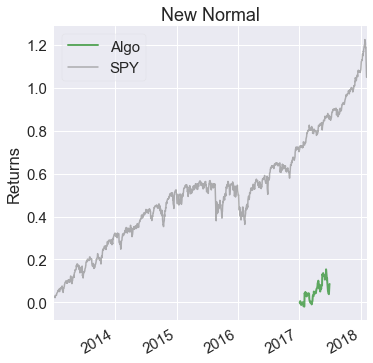

Top 10 long positions of all time,max
AAPL,105.89%


Top 10 short positions of all time,max
AAPL,-103.01%


Top 10 positions of all time,max
AAPL,105.89%


All positions ever held,max
AAPL,105.89%


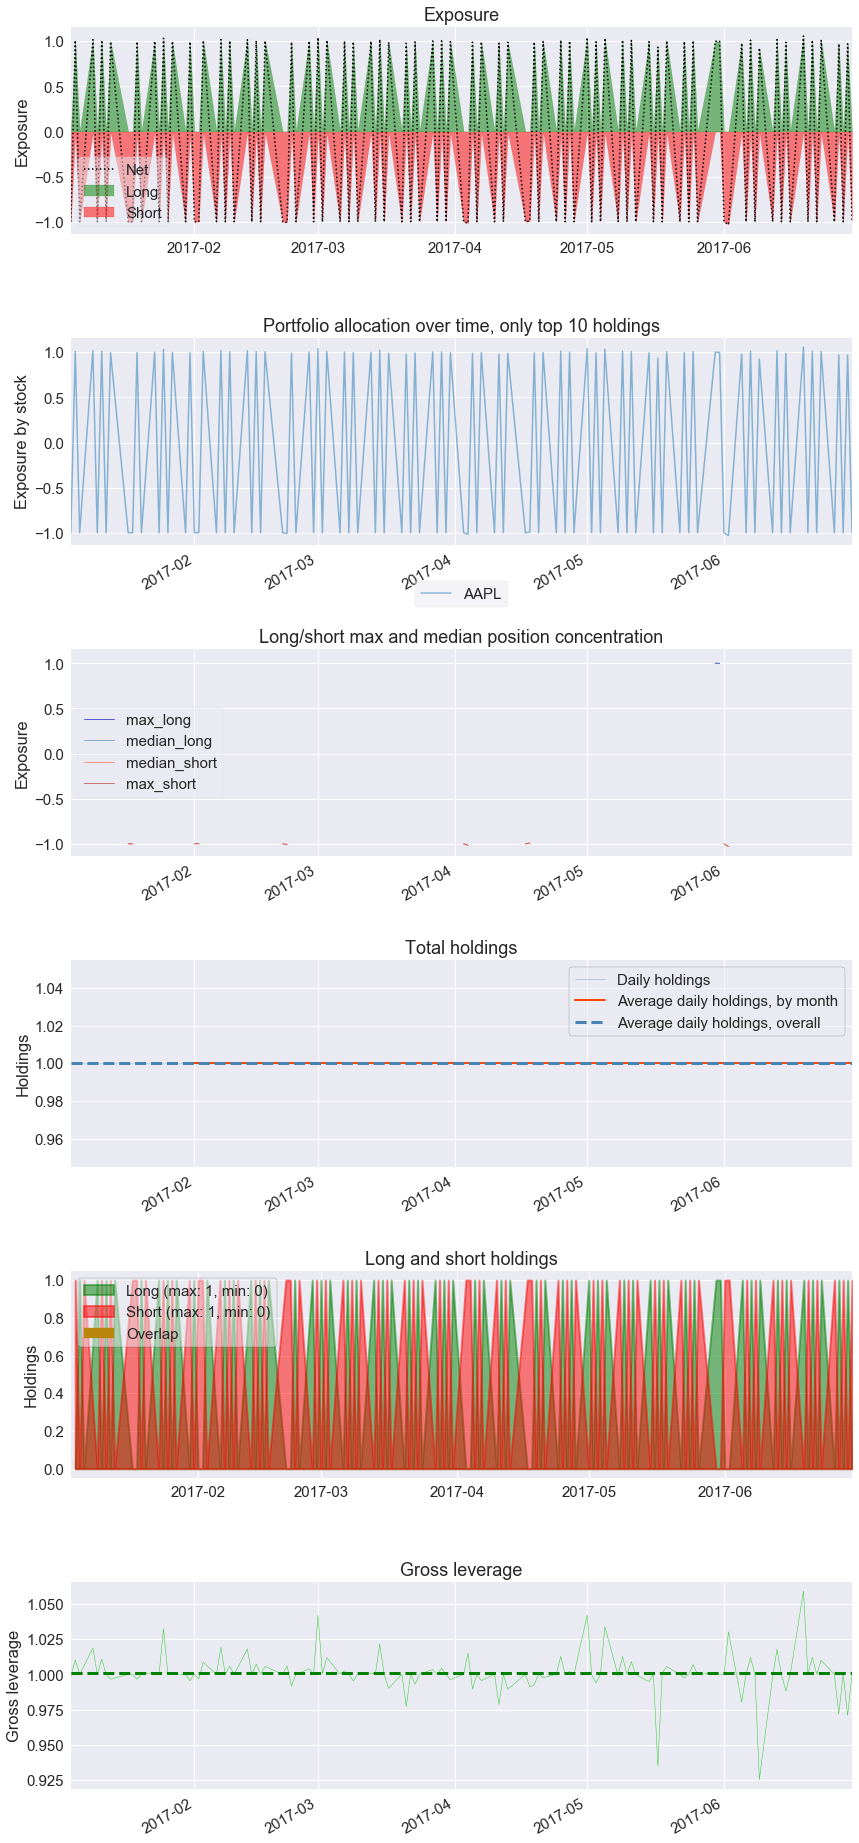

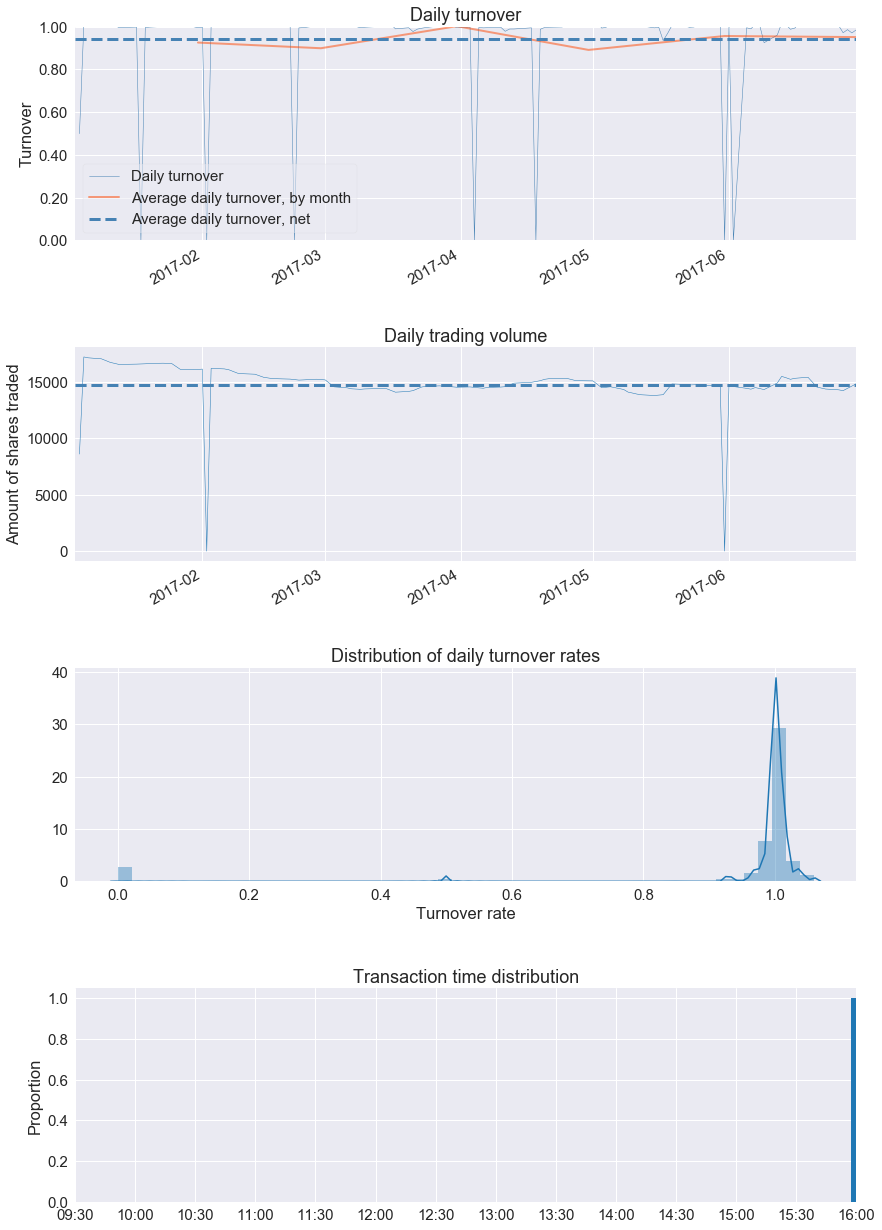

In [9]:
pf_data = pyfolio.utils.extract_rets_pos_txn_from_zipline(result)
pyfolio.create_full_tear_sheet(*pf_data)

### Vardon Backtest

In [10]:
def initialize(context):
    context.transactions = picks
    
    z.set_commission(f.commission.PerShare(cost=0, min_trade_cost=0))
    z.set_slippage(f.slippage.FixedSlippage(spread=0.0))
    
    # Scheduling function to run one minute before close will result in it executing at close
    z.schedule_function(func = order_stocks, time_rule = z.time_rules.market_close(minutes = 1), 
                        half_days=True)

def order_stocks(context, data):
    # Get date that zipline is on in the backtest
    current_date = (z.get_datetime()
                        .tz_localize(None)
                        .normalize())
    
    transactions = context.transactions.loc[current_date]
    
    # Place order for each transaction
    for row in transactions.itertuples(index=True, name='Pandas'):
        z.order(z.symbol(row[1]), row[2])
